<a href="https://colab.research.google.com/github/dlopezuj/TFM_getrificacion_BCN/blob/main/Clustering_con_el_m%C3%A9todo_K_means_todos_los_par%C3%A1metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicación del clustering con el método K-means todos los parámetros

In [2]:
# importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Lectura de los dataframes creados
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# realizamos la lectura del dataset generado
data_gentrification = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/output/df_union_factores.csv')

In [5]:
# visualizamos los resultados
data_gentrification

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,1,2015,9.1,11365,2.84,113.2,949,23379.571429,10.9975,2807.075,21.0,21.0,89.0,7.0,44.0,1739.0,9018
1,1,2016,9.6,11213,2.81,105.5,948,23866.761905,12.2700,2807.075,21.0,21.0,94.0,7.0,45.0,1740.0,9315
2,1,2017,10.5,11508,2.81,113.4,959,24383.952381,13.8950,3602.200,21.0,22.0,106.0,7.0,45.0,1725.0,10042
3,1,2018,9.3,11536,2.77,121.4,946,25485.809524,14.0175,4063.175,21.0,23.0,110.0,8.0,46.0,1569.0,10591
4,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.3250,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,73,2015,7.8,3622,2.51,38.0,717,30052.666667,8.9900,1795.525,5.0,0.0,2.0,0.0,0.0,148.0,2923
361,73,2016,8.2,3566,2.51,35.1,714,30739.095238,9.1225,1795.525,5.0,0.0,2.0,0.0,0.0,189.0,3144
362,73,2017,7.9,3551,2.51,43.2,716,30945.809524,10.1650,2083.500,5.0,0.0,2.0,0.0,0.0,165.0,3306
363,73,2018,6.6,3624,2.51,40.0,720,31907.428571,11.1450,2293.950,5.0,0.0,2.0,0.0,0.0,139.0,3485


In [6]:
# obtenemos los valores para los años 2019, 2018 y 2015 
data_gentrification_2019 = data_gentrification[(data_gentrification['Any'] == 2019)]
data_gentrification_2015 = data_gentrification[(data_gentrification['Any'] == 2015)]

In [7]:
# visualizamos los resultados
data_gentrification_2019

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
4,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.325,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185
9,2,2019,6.7,6050,2.79,253.6,546,30316.444444,14.275,5067.000,110.0,5.0,151.0,2.0,57.0,1680.0,6414
14,3,2019,5.7,4043,2.90,130.4,1097,27120.090909,17.400,4884.000,95.0,1.0,86.0,2.0,5.0,682.0,4190
19,4,2019,6.3,6214,2.18,132.8,697,30888.538462,15.175,4419.775,145.0,11.0,130.0,2.0,23.0,562.0,8725
24,5,2019,6.3,5850,2.26,95.1,962,41890.550000,14.000,4946.525,137.0,6.0,27.0,7.0,10.0,861.0,11450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,69,2019,12.1,1621,2.49,52.9,563,47086.428571,17.350,5773.650,58.0,1.0,29.0,8.0,11.0,170.0,4529
349,70,2019,9.6,4034,2.51,110.5,878,28615.000000,11.350,3610.650,34.0,1.0,2.0,5.0,1.0,164.0,2572
354,71,2019,9.0,3083,2.95,51.9,1371,37504.833333,14.100,4345.350,77.0,0.0,12.0,2.0,1.0,228.0,4700
359,72,2019,7.1,3377,2.56,45.7,1113,35230.444444,11.925,3738.825,25.0,1.0,7.0,2.0,0.0,174.0,4641


In [8]:
# visualizamos los resultados
data_gentrification_2015

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,1,2015,9.1,11365,2.84,113.2,949,23379.571429,10.9975,2807.075,21.0,21.0,89.0,7.0,44.0,1739.0,9018
5,2,2015,6.4,4147,2.36,142.2,454,26896.555556,11.2900,4255.375,13.0,5.0,103.0,1.0,44.0,2064.0,5255
10,3,2015,6.5,3535,2.20,103.3,1149,23761.181818,16.3325,4160.150,15.0,1.0,62.0,2.0,5.0,936.0,3399
15,4,2015,7.3,5707,2.26,113.6,695,26178.461538,12.7400,3677.250,21.0,9.0,82.0,2.0,17.0,525.0,7482
20,5,2015,7.5,5539,2.46,63.5,944,37344.500000,10.8925,3792.425,19.0,6.0,17.0,6.0,10.0,929.0,10099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,69,2015,13.4,1917,2.47,50.3,581,40525.857143,12.4175,5516.975,11.0,1.0,19.0,8.0,10.0,257.0,4237
345,70,2015,8.3,3743,2.74,68.8,891,25517.923077,8.2675,2270.225,12.0,1.0,2.0,4.0,1.0,218.0,1880
350,71,2015,9.1,3117,2.50,46.6,1496,32677.500000,9.9950,3125.150,11.0,0.0,8.0,2.0,1.0,209.0,3749
355,72,2015,7.9,3282,2.46,36.9,1147,31512.333333,9.3350,3119.300,4.0,1.0,3.0,1.0,0.0,188.0,3851


In [9]:
data_gentrification_2019.reset_index(drop=True, inplace=True)
data_gentrification_2015.reset_index(drop=True, inplace=True)

In [10]:
data_gentrification_2019

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.325,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185
1,2,2019,6.7,6050,2.79,253.6,546,30316.444444,14.275,5067.000,110.0,5.0,151.0,2.0,57.0,1680.0,6414
2,3,2019,5.7,4043,2.90,130.4,1097,27120.090909,17.400,4884.000,95.0,1.0,86.0,2.0,5.0,682.0,4190
3,4,2019,6.3,6214,2.18,132.8,697,30888.538462,15.175,4419.775,145.0,11.0,130.0,2.0,23.0,562.0,8725
4,5,2019,6.3,5850,2.26,95.1,962,41890.550000,14.000,4946.525,137.0,6.0,27.0,7.0,10.0,861.0,11450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,2019,12.1,1621,2.49,52.9,563,47086.428571,17.350,5773.650,58.0,1.0,29.0,8.0,11.0,170.0,4529
69,70,2019,9.6,4034,2.51,110.5,878,28615.000000,11.350,3610.650,34.0,1.0,2.0,5.0,1.0,164.0,2572
70,71,2019,9.0,3083,2.95,51.9,1371,37504.833333,14.100,4345.350,77.0,0.0,12.0,2.0,1.0,228.0,4700
71,72,2019,7.1,3377,2.56,45.7,1113,35230.444444,11.925,3738.825,25.0,1.0,7.0,2.0,0.0,174.0,4641


In [11]:
# obtenemos la variación entre los años 2019 y 2015
df_incremento_2019_2015 = data_gentrification_2019 - data_gentrification_2015

In [12]:
df_incremento_2019_2015

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,0,4,0.0,663,-0.35,12.7,6,3436.333333,3.3275,754.225,151.0,2.0,46.0,1.0,3.0,450.0,2167
1,0,4,0.3,1903,0.43,111.4,92,3419.888889,2.9850,811.625,97.0,0.0,48.0,1.0,13.0,-384.0,1159
2,0,4,-0.8,508,0.70,27.1,-52,3358.909091,1.0675,723.850,80.0,0.0,24.0,0.0,0.0,-254.0,791
3,0,4,-1.0,507,-0.08,19.2,2,4710.076923,2.4350,742.525,124.0,2.0,48.0,0.0,6.0,37.0,1243
4,0,4,-1.2,311,-0.20,31.6,18,4546.050000,3.1075,1154.100,118.0,0.0,10.0,1.0,0.0,-68.0,1351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,4,-1.3,-296,0.02,2.6,-18,6560.571429,4.9325,256.675,47.0,0.0,10.0,0.0,1.0,-87.0,292
69,0,4,1.3,291,-0.23,41.7,-13,3097.076923,3.0825,1340.425,22.0,0.0,0.0,1.0,0.0,-54.0,692
70,0,4,-0.1,-34,0.45,5.3,-125,4827.333333,4.1050,1220.200,66.0,0.0,4.0,0.0,0.0,19.0,951
71,0,4,-0.8,95,0.10,8.8,-34,3718.111111,2.5900,619.525,21.0,0.0,4.0,1.0,0.0,-14.0,790


In [13]:
# eliminamos las columnas Codi_Barri y Any que no se tienen en cuenta en la predicción
df_incremento_2019_2015_select = df_incremento_2019_2015.drop(['Codi_Barri', 'Any'], axis=1)


In [14]:
# renombramos 
df_final = df_incremento_2019_2015_select

df_final

,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
0,0.0,663,-0.35,12.7,6,3436.333333,3.3275,754.225,151.0,2.0,46.0,1.0,3.0,450.0,2167
1,0.3,1903,0.43,111.4,92,3419.888889,2.9850,811.625,97.0,0.0,48.0,1.0,13.0,-384.0,1159
2,-0.8,508,0.70,27.1,-52,3358.909091,1.0675,723.850,80.0,0.0,24.0,0.0,0.0,-254.0,791
3,-1.0,507,-0.08,19.2,2,4710.076923,2.4350,742.525,124.0,2.0,48.0,0.0,6.0,37.0,1243
4,-1.2,311,-0.20,31.6,18,4546.050000,3.1075,1154.100,118.0,0.0,10.0,1.0,0.0,-68.0,1351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-1.3,-296,0.02,2.6,-18,6560.571429,4.9325,256.675,47.0,0.0,10.0,0.0,1.0,-87.0,292
69,1.3,291,-0.23,41.7,-13,3097.076923,3.0825,1340.425,22.0,0.0,0.0,1.0,0.0,-54.0,692
70,-0.1,-34,0.45,5.3,-125,4827.333333,4.1050,1220.200,66.0,0.0,4.0,0.0,0.0,19.0,951
71,-0.8,95,0.10,8.8,-34,3718.111111,2.5900,619.525,21.0,0.0,4.0,1.0,0.0,-14.0,790


In [15]:
# calculamos la correlación
df_final.corr(method="pearson").abs()

,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores
Tasa_natalidad_mil_hab,1.000000,0.187332,0.017040,0.241314,0.010754,0.093769,0.255002,0.019320,0.154648,0.005380,0.031624,0.022424,0.040952,0.075082,0.003350
jovenes,0.187332,1.000000,0.135551,0.735397,0.194258,0.076916,0.008423,0.033353,0.417586,0.176753,0.557799,0.261443,0.519028,0.180690,0.416276
Ocupacion_media(personas_domicilio),0.017040,0.135551,1.000000,0.227464,0.162985,0.031238,0.011971,0.216691,0.063917,0.137258,0.119045,0.040834,0.060490,0.306327,0.132299
Tasa_migracion_mil_hab,0.241314,0.735397,0.227464,1.000000,0.278532,0.303911,0.007642,0.179449,0.180751,0.017103,0.251390,0.170240,0.349031,0.295162,0.258491
Densitat neta (hab/ha),0.010754,0.194258,0.162985,0.278532,1.000000,0.268747,0.023065,0.123563,0.255951,0.055019,0.103968,0.083439,0.023742,0.029404,0.122922
renta_media_hogar(euros),0.093769,0.076916,0.031238,0.303911,0.268747,1.000000,0.024737,0.274467,0.142731,0.055775,0.180210,0.074420,0.088684,0.110303,0.010163
Alquiler_medio(Euros/m2 mes),0.255002,0.008423,0.011971,0.007642,0.023065,0.024737,1.000000,0.193695,0.101636,0.015198,0.030846,0.009826,0.052988,0.145750,0.045701
precio_vivienda_Euros/m2,0.019320,0.033353,0.216691,0.179449,0.123563,0.274467,0.193695,1.000000,0.218801,0.172921,0.141513,0.173324,0.140687,0.018646,0.121100
transporte,0.154648,0.417586,0.063917,0.180751,0.255951,0.142731,0.101636,0.218801,1.000000,0.567394,0.814123,0.409679,0.682065,0.011304,0.713075
cultura,0.005380,0.176753,0.137258,0.017103,0.055019,0.055775,0.015198,0.172921,0.567394,1.000000,0.545436,0.010463,0.521117,0.162431,0.358757


In [16]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] > 0.50)]

# Drop features 
df_final.drop(to_drop, axis=1, inplace=True)

<ipython-input-16-19beedc4384d>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [17]:
# columnas eliminadas por estar correlacionadas
print(to_drop)

['Tasa_migracion_mil_hab', 'cultura', 'restaurantes', 'Hoteles', 'Estudios_superiores']


# Normalizamos los valores

In [18]:
# lo primero que haremos será normalizar los valores, para que todas las columnas se encuentren dentro del mismo rango

In [ ]:
#scaler
scaler = StandardScaler()
scaler.fit(df_final)
df_incremento_norm = scaler.transform(df_final)

In [ ]:
# visualizamos los resultados
df_incremento_norm

array([[ 5.23272550e-01,  1.73204622e+00, -2.13332337e+00,
        -2.32835430e-01, -5.14510750e-01,  4.77174724e-01,
        -5.39771888e-01,  1.94835528e+00,  9.82397418e-01,
         4.36352307e+00],
       [ 7.54314260e-01,  5.76416287e+00,  2.17876157e+00,
         2.30932254e+00, -5.23084111e-01,  7.48242991e-02,
        -3.92697974e-01,  9.61155213e-01,  9.82397418e-01,
        -3.68044264e+00],
       [-9.28386782e-02,  1.22803164e+00,  3.67140636e+00,
        -1.94731406e+00, -5.54876114e-01, -2.17775071e+00,
        -6.17600636e-01,  6.50370007e-01, -6.47489207e-01,
        -2.42658708e+00],
       [-2.46866485e-01,  1.22477993e+00, -6.40678585e-01,
        -3.51075336e-01,  1.49559335e-01, -5.71285873e-01,
        -5.69750368e-01,  1.45475525e+00, -6.47489207e-01,
         3.80120386e-01],
       [-4.00894292e-01,  5.87445364e-01, -1.30407627e+00,
         1.21884286e-01,  6.40434008e-02,  2.18730656e-01,
         4.84813150e-01,  1.34506635e+00,  9.82397418e-01,
        -6.

Búsqueda de la cantidad óptima de clústers - método del codo

Text(0.5, 1.0, 'Elbow curve')

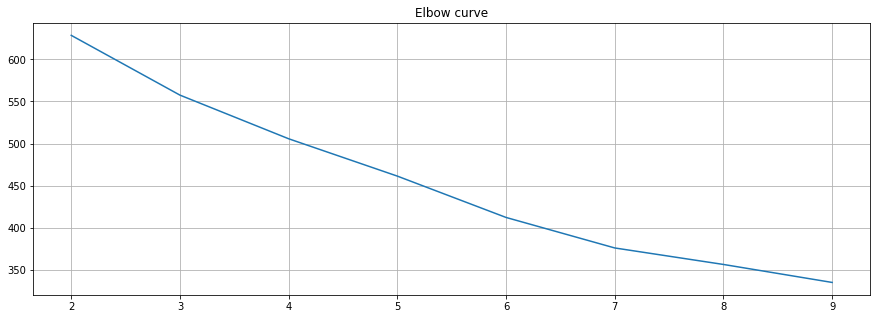

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_incremento_norm)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
# setting ticks for x-axis
ax = plt.axes()
ax.set_xticks([1,2,3,4,5, 6,7, 8,9, 10])
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

De la representación obtenemos el número óptimo podría tratarse de 3 ó 4 clústers

# Aplicación del Algotirmo Kmeans

In [ ]:
# Definimos varios métodos para los valores de k = 3 y 4 y obtenemos los resultados


In [ ]:
k = 3
kmeans_model3 = KMeans(n_clusters=k).fit(df_incremento_norm)

In [ ]:
k = 4
kmeans_model4 = KMeans(n_clusters=k).fit(df_incremento_norm)

In [ ]:
#kmeans_model2.labels_

In [ ]:
kmeans_model3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 2, 1, 1], dtype=int32)

In [ ]:
kmeans_output = data_gentrification_2019

In [ ]:
#kmeans_output['Kmeans_clusters_k2'] = kmeans_model2.labels_
kmeans_output['Kmeans_clusters_k3'] = kmeans_model3.labels_
kmeans_output['Kmeans_clusters_k4'] = kmeans_model4.labels_

<ipython-input-29-6cb2fb6ebf8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_output['Kmeans_clusters_k3'] = kmeans_model3.labels_
<ipython-input-29-6cb2fb6ebf8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_output['Kmeans_clusters_k4'] = kmeans_model4.labels_


In [ ]:
# visualizamos los resultados
kmeans_output.head()

,Codi_Barri,Any,Tasa_natalidad_mil_hab,jovenes,Ocupacion_media(personas_domicilio),Tasa_migracion_mil_hab,Densitat neta (hab/ha),renta_media_hogar(euros),Alquiler_medio(Euros/m2 mes),precio_vivienda_Euros/m2,transporte,cultura,restaurantes,Parques,Hoteles,incidentes,Estudios_superiores,Kmeans_clusters_k3,Kmeans_clusters_k4
0,1,2019,9.1,12028,2.49,125.9,955,26815.904762,14.325,3561.300,172.0,23.0,135.0,8.0,47.0,2189.0,11185,2,2
1,2,2019,6.7,6050,2.79,253.6,546,30316.444444,14.275,5067.000,110.0,5.0,151.0,2.0,57.0,1680.0,6414,2,2
2,3,2019,5.7,4043,2.90,130.4,1097,27120.090909,17.400,4884.000,95.0,1.0,86.0,2.0,5.0,682.0,4190,2,3
3,4,2019,6.3,6214,2.18,132.8,697,30888.538462,15.175,4419.775,145.0,11.0,130.0,2.0,23.0,562.0,8725,2,2
4,5,2019,6.3,5850,2.26,95.1,962,41890.550000,14.000,4946.525,137.0,6.0,27.0,7.0,10.0,861.0,11450,2,2


In [ ]:
Kmeans_result = kmeans_output.drop([	'Any',	'Tasa_natalidad_mil_hab',	'jovenes',	'Ocupacion_media(personas_domicilio)',	'Tasa_migracion_mil_hab',	'Densitat neta (hab/ha)',	'renta_media_hogar(euros)',	'Alquiler_medio(Euros/m2 mes)',	'precio_vivienda_Euros/m2',	'transporte',	'cultura',	'restaurantes',	'Parques',	'Hoteles',	'incidentes',	'Estudios_superiores'], axis=1)

In [ ]:
# creamos un dataset con los resultados obtenidos. Este conjunto de datos contiene 73 filas (una para cada barrio) y en las columnas Kmeans, la asignación de cara barrio que ha realizado el algoritmo
Kmeans_result

,Codi_Barri,Kmeans_clusters_k3,Kmeans_clusters_k4
0,1,2,2
1,2,2,2
2,3,2,3
3,4,2,2
4,5,2,2
...,...,...,...
68,69,1,1
69,70,1,0
70,71,2,3
71,72,1,0


## Escritura de datos a csv

In [ ]:
# escribimos los resultados a un csv
Kmeans_result.to_csv('/content/gdrive/MyDrive/Colab Notebooks/output/Kmeans_result_todos_parametros_ultimo_ok.csv', index = False) 